In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [7]:
data={
   'Position Level': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Salary': [45000, 50000, 60000, 80000, 110000, 150000, 200000, 300000, 500000, 1000000]
}

In [8]:
df=pd.DataFrame(data)

In [9]:
df

,Position Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


In [10]:
df.columns.tolist()


['Position Level', 'Salary']

In [11]:
X = df[['Position Level']].values # Independent variable

In [12]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [13]:
y = df['Salary'].values 

In [14]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

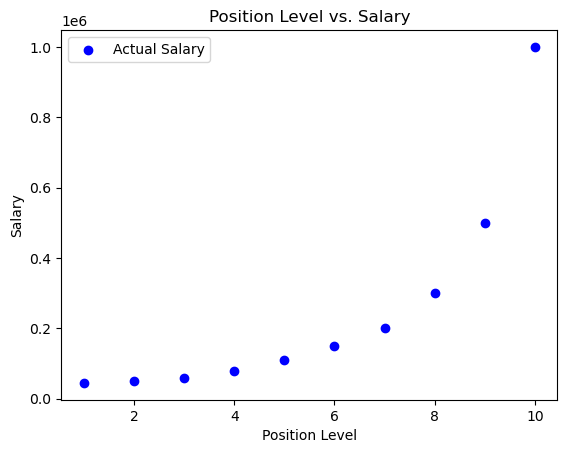

In [16]:
plt.scatter(X, y, color='blue', label='Actual Salary')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.title('Position Level vs. Salary')
plt.legend()
plt.show()

In [19]:
degree = 4 

In [21]:
polu_features = PolynomialFeatures(degree=degree)
X_poly =poly_features.fit_transform(X)

In [22]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [23]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly, y)

LinearRegression()

In [24]:
y_poly_pred = poly_reg_model.predict(X_poly)

In [25]:
y_poly_pred

array([ 53356.64335681,  31759.90675996,  58642.19114221,  94632.86713289,
       121724.94172498, 143275.05827508, 184003.49650349, 289994.17249411,
       528694.63869452, 988916.08391594])

C:\Users\Dell\AppData\Local\Temp\ipykernel_10504\3455914973.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1) # For a smoother curve


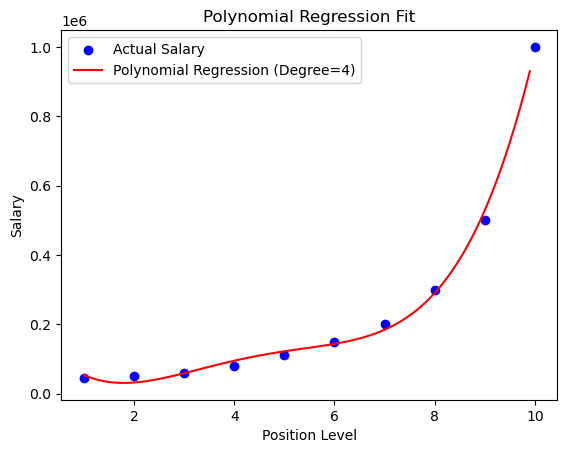

In [26]:
X_grid = np.arange(min(X), max(X), 0.1) # For a smoother curve
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='blue', label='Actual Salary')
plt.plot(X_grid, poly_reg_model.predict(poly_features.transform(X_grid)), color='red', label=f'Polynomial Regression (Degree={degree})')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()

In [27]:
mse = mean_squared_error(y, y_poly_pred)
print(f"Mean Squared Error of Polynomial Regression (Degree {degree}): {mse}")

Mean Squared Error of Polynomial Regression (Degree 4): 210343822.8438184
